In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Pre-Processing**

In [45]:
# Load
df = pd.read_csv("fraud_dataset.csv")

In [ ]:
df.head(20)

,transaction_id,customer_id,tx_datetime,amount,is_weekend,night_transaction,card_not_present,account_age_days,new_merchant,international_txn,impossible_travel,txn_velocity_5min,new_device_high_amount,blacklisted_ip,multiple_cards_same_device,fraud_label
0,1,1163,2025-01-02 04:59:00,565.54,1,0,0,72,0,0,0,1,0,0,0,0
1,2,1143,2025-01-16 07:39:00,1002.20,1,0,1,302,1,0,0,3,0,0,0,0
2,3,1026,2025-01-14 08:13:00,472.80,0,1,1,310,1,0,0,9,0,0,0,1
3,4,1160,2025-01-17 14:29:00,3096.41,1,0,0,24,0,1,1,4,0,0,0,1
4,5,1041,2025-01-10 23:52:00,1857.20,0,1,0,312,0,0,0,7,0,0,0,0
5,6,1175,2025-01-19 00:08:00,1628.17,0,0,0,162,1,1,0,10,0,0,0,1
6,7,1164,2025-01-23 11:03:00,2299.67,1,0,0,288,1,1,0,7,0,1,0,1
7,8,1023,2025-01-01 12:32:00,3781.35,0,0,0,349,1,0,0,10,0,0,1,1
8,9,1174,2025-01-05 20:13:00,3606.40,1,1,0,151,1,0,0,5,0,0,0,0
9,10,1160,2025-01-14 23:53:00,1499.24,0,0,1,83,0,1,0,2,0,0,0,0


In [ ]:
# Drop identifiers
# df = df.drop(["transaction_id", "customer_id"], axis=1)

In [ ]:
# Convert datetime
df["tx_datetime"] = pd.to_datetime(df["tx_datetime"])
df["tx_hour"] = df["tx_datetime"].dt.hour
df["tx_day"] = df["tx_datetime"].dt.day
df["tx_month"] = df["tx_datetime"].dt.month

In [ ]:
df.head(20)

,transaction_id,customer_id,tx_datetime,amount,is_weekend,night_transaction,card_not_present,account_age_days,new_merchant,international_txn,impossible_travel,txn_velocity_5min,new_device_high_amount,blacklisted_ip,multiple_cards_same_device,fraud_label,tx_hour,tx_day,tx_month
0,1,1163,2025-01-02 04:59:00,565.54,1,0,0,72,0,0,0,1,0,0,0,0,4,2,1
1,2,1143,2025-01-16 07:39:00,1002.20,1,0,1,302,1,0,0,3,0,0,0,0,7,16,1
2,3,1026,2025-01-14 08:13:00,472.80,0,1,1,310,1,0,0,9,0,0,0,1,8,14,1
3,4,1160,2025-01-17 14:29:00,3096.41,1,0,0,24,0,1,1,4,0,0,0,1,14,17,1
4,5,1041,2025-01-10 23:52:00,1857.20,0,1,0,312,0,0,0,7,0,0,0,0,23,10,1
5,6,1175,2025-01-19 00:08:00,1628.17,0,0,0,162,1,1,0,10,0,0,0,1,0,19,1
6,7,1164,2025-01-23 11:03:00,2299.67,1,0,0,288,1,1,0,7,0,1,0,1,11,23,1
7,8,1023,2025-01-01 12:32:00,3781.35,0,0,0,349,1,0,0,10,0,0,1,1,12,1,1
8,9,1174,2025-01-05 20:13:00,3606.40,1,1,0,151,1,0,0,5,0,0,0,0,20,5,1
9,10,1160,2025-01-14 23:53:00,1499.24,0,0,1,83,0,1,0,2,0,0,0,0,23,14,1


In [ ]:
df = df.drop("tx_datetime", axis=1)

#  **Training Data**

**Split features & label**

In [ ]:
X = df.drop("fraud_label", axis=1)
y = df["fraud_label"]

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Logistic Regression**

**Scale (important for Logistic Regression)**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", auc)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       518
           1       0.91      0.88      0.89       482

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

ROC AUC: 0.9706299363975712


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[474  44]
 [ 58 424]]


In [ ]:
import pandas as pd

importance = pd.DataFrame({
    "feature": X_train.columns,
    "weight": model.coef_[0]
}).sort_values(by="weight", ascending=False)

print(importance)


                       feature    weight
10           txn_velocity_5min  2.911593
9            impossible_travel  1.577204
7                 new_merchant  1.503721
8            international_txn  1.481275
12              blacklisted_ip  1.448903
2                       amount  1.201908
13  multiple_cards_same_device  1.041895
11      new_device_high_amount  0.994541
4            night_transaction  0.746033
5             card_not_present  0.664197
3                   is_weekend  0.057124
1                  customer_id  0.018646
14                     tx_hour  0.009435
15                      tx_day  0.007043
16                    tx_month  0.000000
0               transaction_id -0.001240
6             account_age_days -0.191672


# TEST RESULT

**Test**

In [ ]:
df.head(20)

,transaction_id,customer_id,amount,is_weekend,night_transaction,card_not_present,account_age_days,new_merchant,international_txn,impossible_travel,txn_velocity_5min,new_device_high_amount,blacklisted_ip,multiple_cards_same_device,fraud_label,tx_hour,tx_day,tx_month
0,1,1163,565.54,1,0,0,72,0,0,0,1,0,0,0,0,4,2,1
1,2,1143,1002.20,1,0,1,302,1,0,0,3,0,0,0,0,7,16,1
2,3,1026,472.80,0,1,1,310,1,0,0,9,0,0,0,1,8,14,1
3,4,1160,3096.41,1,0,0,24,0,1,1,4,0,0,0,1,14,17,1
4,5,1041,1857.20,0,1,0,312,0,0,0,7,0,0,0,0,23,10,1
5,6,1175,1628.17,0,0,0,162,1,1,0,10,0,0,0,1,0,19,1
6,7,1164,2299.67,1,0,0,288,1,1,0,7,0,1,0,1,11,23,1
7,8,1023,3781.35,0,0,0,349,1,0,0,10,0,0,1,1,12,1,1
8,9,1174,3606.40,1,1,0,151,1,0,0,5,0,0,0,0,20,5,1
9,10,1160,1499.24,0,0,1,83,0,1,0,2,0,0,0,0,23,14,1


In [40]:
import pandas as pd

new_txn = pd.DataFrame([{
    "transaction_id": 6001,
    "customer_id": 1100,
    "amount": 3500,
    "is_weekend": 0,
    "night_transaction": 0,
    "card_not_present": 1,
    "account_age_days": 20,
    "new_merchant": 1,
    "international_txn": 1,
    "impossible_travel": 0,
    "txn_velocity_5min": 7,
    "new_device_high_amount": 1,
    "blacklisted_ip": 0,
    "multiple_cards_same_device": 0,
    "tx_hour": 2,
    "tx_day": 10,
    "tx_month": 1
}])



In [ ]:
new_txn_scaled = scaler.transform(new_txn)


In [ ]:
prediction = model.predict(new_txn_scaled)
probability = model.predict_proba(new_txn_scaled)[:, 1]

print("Fraud:", prediction[0])
print("Risk probability:", probability[0])


Fraud: 1
Risk probability: 0.999992860473865


# **Testing Multiple**

# 1.   List item



In [ ]:
new_df = pd.read_csv("new_test_transactions.csv")

In [ ]:
new_df = new_df[X_train.columns]

In [ ]:
ids = new_df[["transaction_id", "customer_id"]]

In [ ]:
ids

,transaction_id,customer_id
0,6002,1100
1,6003,1101
2,6004,1102
3,6005,1103
4,6006,1104
5,6007,1105


In [ ]:
new_scaled = scaler.transform(new_df)

In [ ]:
pred = model.predict(new_scaled)
prob = model.predict_proba(new_scaled)[:, 1]


In [39]:
prob

array([7.28277535e-06, 2.20767062e-05, 1.10213406e-01, 1.52527320e-01,
       1.00000000e+00, 1.00000000e+00])

In [ ]:
pred

array([0, 0, 0, 0, 1, 1])

In [ ]:
result = ids.copy()
result["fraud_prediction"] = pred
result["fraud_probability"] = prob

print(result)


   transaction_id  customer_id  fraud_prediction  fraud_probability
0            6002         1100                 0           0.000007
1            6003         1101                 0           0.000022
2            6004         1102                 0           0.110213
3            6005         1103                 0           0.152527
4            6006         1104                 1           1.000000
5            6007         1105                 1           1.000000


In [ ]:
import joblib

joblib.dump(model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [ ]:
# ------------------------------------------------
# Create model
# ------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=10,         # limit tree depth
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

In [ ]:
# ------------------------------------------------
# Train
# ------------------------------------------------
rf_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
# ------------------------------------------------
# Predict
# ------------------------------------------------
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# ------------------------------------------------
# Evaluation
# -----------------------------------------------
print("Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nROC AUC:", roc_auc_score(y_test, rf_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       518
           1       0.98      0.98      0.98       482

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix:
[[509   9]
 [ 10 472]]

ROC AUC: 0.9974567038882391


In [ ]:
import joblib

# save model
joblib.dump(rf_model, "fraud_random_forest.pkl")

print("Model saved successfully!")

Model saved successfully!


In [41]:
new_txn

,transaction_id,customer_id,amount,is_weekend,night_transaction,card_not_present,account_age_days,new_merchant,international_txn,impossible_travel,txn_velocity_5min,new_device_high_amount,blacklisted_ip,multiple_cards_same_device,tx_hour,tx_day,tx_month
0,6001,1100,3500,0,0,1,20,1,1,0,7,1,0,0,2,10,1


In [43]:
pred = rf_model.predict(new_txn)
prob = rf_model.predict_proba(new_txn)[:, 1]

In [44]:
print("Prediction:", pred)
print("Fraud Probability:", prob)

Prediction: [1]
Fraud Probability: [0.94780916]


# Data Set Analysis

In [46]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape: (5000, 16)

Columns:
 Index(['transaction_id', 'customer_id', 'tx_datetime', 'amount', 'is_weekend',
       'night_transaction', 'card_not_present', 'account_age_days',
       'new_merchant', 'international_txn', 'impossible_travel',
       'txn_velocity_5min', 'new_device_high_amount', 'blacklisted_ip',
       'multiple_cards_same_device', 'fraud_label'],
      dtype='object')

Missing values:
 transaction_id                0
customer_id                   0
tx_datetime                   0
amount                        0
is_weekend                    0
night_transaction             0
card_not_present              0
account_age_days              0
new_merchant                  0
international_txn             0
impossible_travel             0
txn_velocity_5min             0
new_device_high_amount        0
blacklisted_ip                0
multiple_cards_same_device    0
fraud_label                   0
dtype: int64

Data types:
 transaction_id                  int64
customer_id      

In [47]:
print("Average amount:", df['amount'].mean())
print("Max amount:", df['amount'].max())

Average amount: 2538.5854759999997
Max amount: 4999.07


In [48]:
df.groupby('night_transaction')['amount'].agg(['count', 'mean', 'max'])

,count,mean,max
night_transaction,,,
0,2520,2527.953500,4999.07
1,2480,2549.388935,4994.09


In [49]:
df['txn_velocity_5min'].describe()

,txn_velocity_5min
count,5000.000000
mean,5.545600
std,2.879788
min,1.000000
25%,3.000000
50%,6.000000
75%,8.000000
max,10.000000


In [50]:
txn_per_customer = df.groupby('customer_id')['transaction_id'].count()

print("Average:", txn_per_customer.mean())
print("Top active customers:")
print(txn_per_customer.sort_values(ascending=False).head())


Average: 24.875621890547265
Top active customers:
customer_id
1099    44
1021    38
1175    37
1070    36
1064    36
Name: transaction_id, dtype: int64


In [51]:
df.groupby(pd.cut(df['account_age_days'], [0, 7, 30, 90, 365, 5000]))['transaction_id'].count()


/tmp/ipython-input-2752136807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['account_age_days'], [0, 7, 30, 90, 365, 5000]))['transaction_id'].count()


,transaction_id
account_age_days,
"(0, 7]",106
"(7, 30]",298
"(30, 90]",881
"(90, 365]",3715
"(365, 5000]",0


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Night Transaction → Fraud vs Not Fraud

In [54]:
df.head(5)

,transaction_id,customer_id,tx_datetime,amount,is_weekend,night_transaction,card_not_present,account_age_days,new_merchant,international_txn,impossible_travel,txn_velocity_5min,new_device_high_amount,blacklisted_ip,multiple_cards_same_device,fraud_label
0,1,1163,2025-01-02 04:59:00,565.54,1,0,0,72,0,0,0,1,0,0,0,0
1,2,1143,2025-01-16 07:39:00,1002.20,1,0,1,302,1,0,0,3,0,0,0,0
2,3,1026,2025-01-14 08:13:00,472.80,0,1,1,310,1,0,0,9,0,0,0,1
3,4,1160,2025-01-17 14:29:00,3096.41,1,0,0,24,0,1,1,4,0,0,0,1
4,5,1041,2025-01-10 23:52:00,1857.20,0,1,0,312,0,0,0,7,0,0,0,0


In [67]:
ct = pd.crosstab(df['night_transaction'], df['fraud_label'])

In [68]:
ct

fraud_label,0,1
night_transaction,,
0,1406,1114
1,1071,1409


In [69]:
ct = pd.crosstab(df['night_transaction'], df['fraud_label'])
ct

fraud_label,0,1
night_transaction,,
0,1406,1114
1,1071,1409


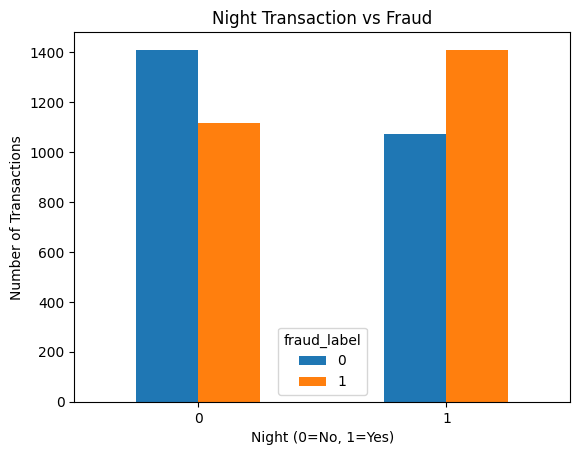

In [57]:
ct = pd.crosstab(df['night_transaction'], df['fraud_label'])

ct.plot(kind='bar')
plt.title("Night Transaction vs Fraud")
plt.xlabel("Night (0=No, 1=Yes)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

# 2) International → Fraud vs Genuine

In [70]:
ct = pd.crosstab(df['international_txn'], df['fraud_label'])
ct

fraud_label,0,1
international_txn,,
0,1526,972
1,951,1551


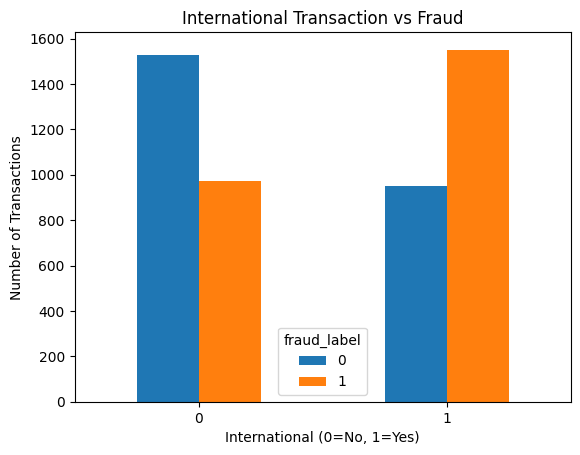

In [58]:
ct = pd.crosstab(df['international_txn'], df['fraud_label'])

ct.plot(kind='bar')
plt.title("International Transaction vs Fraud")
plt.xlabel("International (0=No, 1=Yes)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

# 3) Velocity Distribution

In [61]:
fraud = df[df['fraud_label'] == 1]
not_fraud = df[df['fraud_label'] == 0]

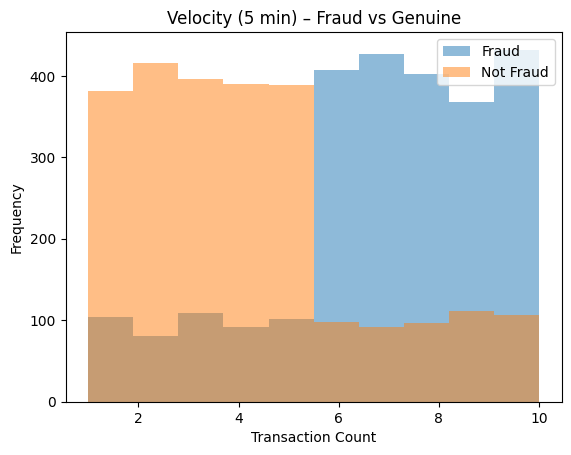

In [71]:
plt.hist(fraud['txn_velocity_5min'], alpha=0.5, label='Fraud')
plt.hist(not_fraud['txn_velocity_5min'], alpha=0.5, label='Not Fraud')

plt.title("Velocity (5 min) – Fraud vs Genuine")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Amount Distribution – Fraud vs Genuine

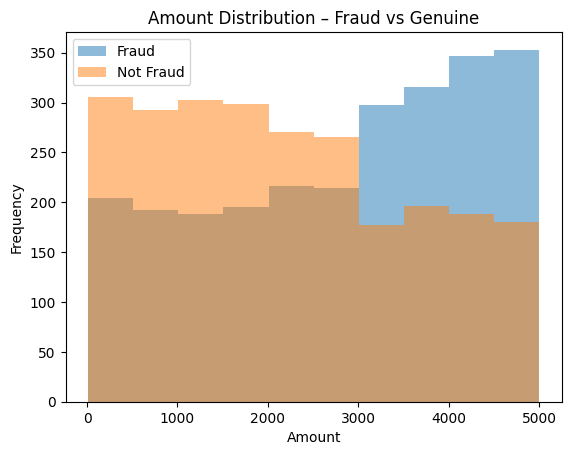

In [63]:
plt.hist(fraud['amount'], alpha=0.5, label='Fraud')
plt.hist(not_fraud['amount'], alpha=0.5, label='Not Fraud')

plt.title("Amount Distribution – Fraud vs Genuine")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# "Account Age – Fraud vs Genuine"

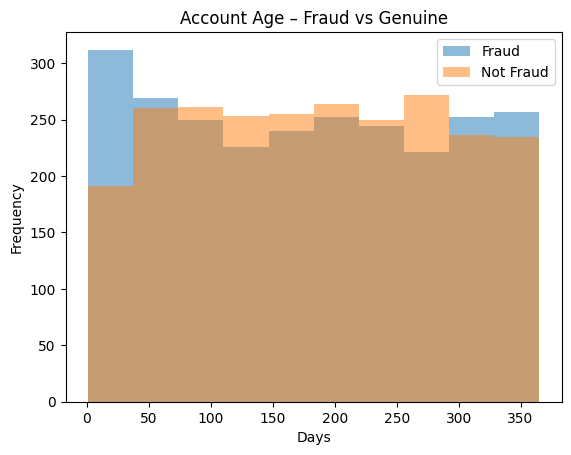

In [64]:
plt.hist(fraud['account_age_days'], alpha=0.5, label='Fraud')
plt.hist(not_fraud['account_age_days'], alpha=0.5, label='Not Fraud')

plt.title("Account Age – Fraud vs Genuine")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Risk Score vs Fraud

In [65]:
risk_cols = [
    'night_transaction',
    'card_not_present',
    'new_merchant',
    'international_txn',
    'impossible_travel',
    'new_device_high_amount',
    'blacklisted_ip',
    'multiple_cards_same_device'
]

df['risk_score'] = df[risk_cols].sum(axis=1)


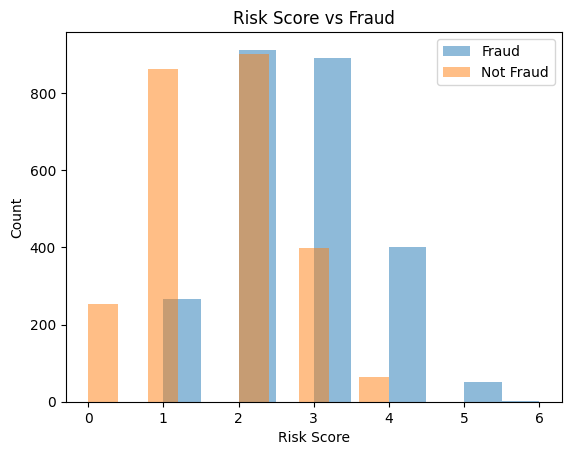

In [66]:
plt.hist(df[df['fraud_label']==1]['risk_score'], alpha=0.5, label="Fraud")
plt.hist(df[df['fraud_label']==0]['risk_score'], alpha=0.5, label="Not Fraud")

plt.title("Risk Score vs Fraud")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.legend()
plt.show()
